In [ ]:
pip install pyodbc

In [ ]:
pip install python-dotenv

In [ ]:
pip install seaborn

🪶DATA GATHERING

In [1]:
#import all the necessary packages
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns


In [50]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install scipy

In [51]:
import matplotlib.pyplot as plt
from scipy import stats
import statistics as staticmethod
from scipy.stats import f_oneway


In [3]:
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection"

In [5]:
connection = pyodbc.connect(connection_string)

In [6]:
#querying data for 2020 from DB

query = "Select * from LP1_startup_funding2020"

data = pd.read_sql(query, connection)

In [7]:
data

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


QUESTIONS
1.What is the distribution of funding amounts in different sectors?
2.Are certain sectors more likely to receive higher funding?
3.Are startups from specific cities or regions more likely to attract higher investments?
4.How does the funding amount vary across different stages of startup development (e.g., Seed, Series A, Series B)?
5.Which sector tends to attract higher investment on average?

In [8]:
#importing/querying data for 2021
query2 = "Select * from LP1_startup_funding2021"
data2 = pd.read_sql(query2, connection)
data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [9]:
#concatenating 2021 and 2020 tables
df_2020_2021 = pd.concat([data,data2])
df_2020_2021.to_csv('2020_2021_data.csv')

In [10]:
data.shape

(1055, 10)

In [12]:
data2.shape

(1209, 9)

In [13]:
df_2020_2021.shape

(2264, 10)

In [14]:
df_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2264 non-null   object 
 1   Founded        2050 non-null   float64
 2   HeadQuarter    2169 non-null   object 
 3   Sector         2251 non-null   object 
 4   What_it_does   2264 non-null   object 
 5   Founders       2248 non-null   object 
 6   Investor       2164 non-null   object 
 7   Amount         2007 non-null   object 
 8   Stage          1372 non-null   object 
 9   column10       2 non-null      object 
dtypes: float64(1), object(9)
memory usage: 194.6+ KB


HYPOTHESIS

H0: There is no significant difference in the amount of investment received by FinTech and EdTech.
H1: There is a significant difference in the amount of investment received by FinTech and EdTech.

In [8]:
df1 = pd.read_csv('2020_2021_data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2264 non-null   object 
 1   Founded        2050 non-null   float64
 2   HeadQuarter    2169 non-null   object 
 3   Sector         2251 non-null   object 
 4   What_it_does   2264 non-null   object 
 5   Founders       2248 non-null   object 
 6   Investor       2164 non-null   object 
 7   Amount         2007 non-null   object 
 8   Stage          1372 non-null   object 
dtypes: float64(1), object(8)
memory usage: 159.3+ KB


In [10]:
# Count the frequency of each sector
sector_frequency = df1['Sector'].value_counts()
# Get the top five sectors
top_five_sectors = sector_frequency.head(5)
print("Top five sectors by frequency:")
print(top_five_sectors)

Top five sectors by frequency:
Sector
FinTech               253
EdTech                209
E-commerce             70
Financial Services     62
Food & Beverages       39
Name: count, dtype: int64


In [12]:
# Remove the dollar sign and comma from the `Amount` column
df1['Amount'] = df1['Amount'].str.strip('$').str.strip(',')
df1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,NaN


In [21]:
df1['Amount'] = df1['Amount'].str.strip(',')

In [22]:
# Remove the comma from the string value in the `Amount` column
df1['Amount'] = df1['Amount'].str.replace(',', '')

In [23]:
# Convert values in 'Amount' column to numeric where possible, coerce errors to NaN for non-convertible values
df1['Amount'] = pd.to_numeric(df1['Amount'], errors='coerce')

In [32]:
# Filter the DataFrame for 'FinTech' sector and check for null values in the 'Amount' column
edtech_null_values = df1[df1['Sector'] == 'FinTech']['Amount'].isnull().sum()
print("Null values in the 'Amount' column for FinTech sector:", edtech_null_values)

Null values in the 'Amount' column for FinTech sector: 0


In [38]:
# Filter the DataFrame for 'EdTech' sector and check for null values in the 'Amount' column
edtech_null_values = df1[df1['Sector'] == 'EdTech']['Amount'].isnull().sum()
print("Null values in the 'Amount' column for EdTech sector:", edtech_null_values)

Null values in the 'Amount' column for EdTech sector: 0


In [35]:
# Calculate the mean amount for 'FinTech' sector
fintech_mean = df1[df1['Sector'] == 'FinTech']['Amount'].mean()
print(f'the mean amount for FinTech Sector is:{fintech_mean} ')

the mean amount for FinTech Sector is:709798068.3486239 


In [29]:
# Replace null values in 'Amount' column for 'EdTech' sector with the mean amount
df1.loc[df1['Sector'] == 'FinTech', 'Amount'] = df1.loc[df1['Sector'] == 'FinTech', 'Amount'].fillna(fintech_mean)

In [36]:
# Calculate the mean amount for 'EdTech' sector
edtech_mean = df1[df1['Sector'] == 'EdTech']['Amount'].mean()
print(f'the mean amount for EdTech Sector is:{edtech_mean} ')

the mean amount for EdTech Sector is:30992221.042944785 


In [37]:
# Replace null values in 'Amount' column for 'EdTech' sector with the mean amount
df1.loc[df1['Sector'] == 'EdTech', 'Amount'] = df1.loc[df1['Sector'] == 'EdTech', 'Amount'].fillna(edtech_mean)

Perform T-TEST

In [39]:
Sector_FinTech = df1[df1["Sector"] == "FinTech"]
Sector_EdTech = df1[df1["Sector"] == "EdTech"]

In [40]:
t,p = stats.ttest_ind(Sector_FinTech["Amount"], Sector_EdTech["Amount"])

print(f't-valu: {t}')
print(f'p-value: {p}')

t-valu: 1.0408490233592227
p-value: 0.2984923668949894


Decision

In [53]:
if p <0.05:
    print("We reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


Findings

At a significance of 5%, there is enough evidence to support the statement that there is no significant difference in the amount of investment received by FinTech and EdTech sectors.

In [46]:
# Filter the DataFrame for 'EdTech' and 'AgriTech' sectors
fintech_ed_df = df1[df1['Sector'].isin(['FinTech', 'EdTech'])]

# Create a new DataFrame with only 'EdTech' and 'AgriTech' sectors and their 'Amount' data
new_df = fintech_ed_df[['Sector', 'Amount']]

# Display the new DataFrame
print(new_df.head())

     Sector        Amount
1    EdTech  1.000000e+05
6    EdTech  6.000000e+05
8   FinTech  4.500000e+07
18  FinTech  7.097981e+08
19  FinTech  1.000000e+06


NameError: name 'ax' is not defined

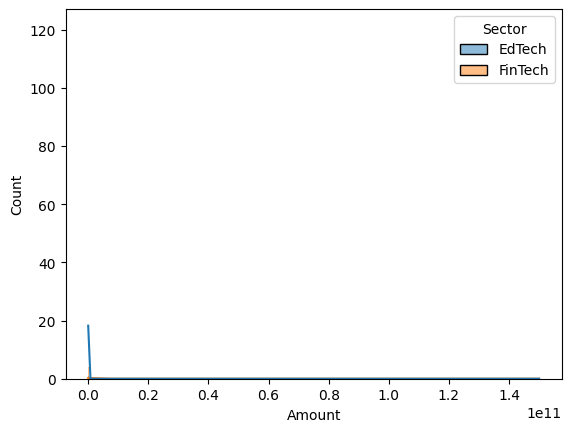

In [52]:
#plot a histogram
sns.histplot(data=new_df, x ='Amount', hue = 'Sector', kde=True)
# Adjust the y-axis limits
ax.set_ylim(0, 20)

# Show the plot
plt.show()

🧹DATA CLEANING

📊EXPLORATORY DATA ANALYSIS

In [ ]:
pip install requests

In [16]:
df_2019 = pd.read_csv('startup_funding2019.csv')

In [17]:
df_2019.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"20,000,000",Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"275,000,000",Series G


In [9]:
#get the number of rows and columns
print(df_2019.shape)

(89, 9)


In [10]:
#get the data types of each column in the df
print(df_2019.dtypes)

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object


In [15]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [18]:
#check for duplicates
df_2019.duplicated().sum()

0

In [20]:
#check for missing values
df_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [12]:
df_2018 = pd.read_csv('startup_funding2018.csv')
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Currency,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,_,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"40,000,000",rupee,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Fi_cial Services, Lending, Marketplace",Series A,"65,000,000",rupee,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Fi_cial Services, FinTech",Angel,2000000,_,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,_,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [13]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Currency       526 non-null    object
 5   Location       526 non-null    object
 6   About Company  526 non-null    object
dtypes: object(7)
memory usage: 28.9+ KB
